<a href="https://colab.research.google.com/github/atishayj4in/Handwritten_Digits_Classifier/blob/main/HandwrittenDigitsClassification_by_AtishayJain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 182, 146, 127,  70,
         30,  45,  36, 215, 175,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,   0,   0,   0,   0,
          0,   0,   0, 207, 246,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  55, 251, 169,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  11, 215, 232,  20,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         20, 190, 250,  61,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 118,
        206, 254, 248, 142, 108,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 223, 254,
        254, 254, 254, 254, 254, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 174, 129,
         95,  16,  16,  16, 106, 249, 125,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 179, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 244,  20,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 100, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 234, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4, 140,   5,   0,   0,   0,
          0,   0,   0,   3, 150, 254, 129,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  64, 254, 181,  38,   0,   0,
          0,   0,  34, 188, 254, 209,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 226, 255, 223,  88,  68,
        128, 157, 242, 254, 207,  23,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 210, 254, 254, 254,
        254, 255, 254, 187,  49,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  41, 129, 239, 229,
        179,  91,  16,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

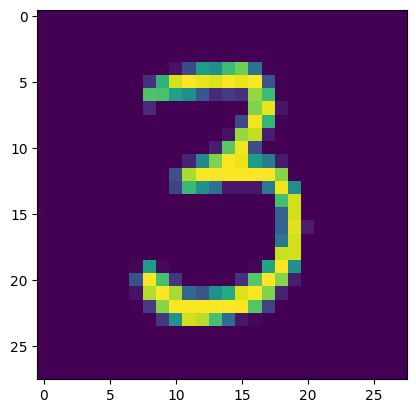

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[50])

In [ ]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         33, 151, 208, 252, 252, 252, 146,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 152,
        244, 252, 253, 224, 211, 252, 232,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 152, 239, 252,
        252, 252, 216,  31,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 252,
        252, 217,  29,   0,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 252, 252, 220,
        167,  30,   0,   0,  77, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 128,  58,  22,
          0,   0,   0,   0, 100, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 157, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        110, 121, 122, 121, 202, 252, 194,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  53, 179,
        253, 253, 255, 253, 253, 228,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5,  54, 227, 252, 243,
        228, 170, 242, 252, 252, 231, 117,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,  78, 252, 252, 125,  59,
          0,  18, 208, 252, 252, 252, 252,  87,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5, 135, 252, 252, 180,  16,   0,
         21, 203, 253, 247, 129, 173, 252, 252, 184,  66,  49,  49,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3, 136, 252, 241, 106,  17,   0,  53,
        200, 252, 216,  65,   0,  14,  72, 163, 241, 252, 252, 223,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 105, 252, 242,  88,  18,  73, 170, 244,
        252, 126,  29,   0,   0,   0,   0,   0,  89, 180, 180,  37,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 231, 252, 245, 205, 216, 252, 252, 252,
        124,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 207, 252, 252, 252, 252, 178, 116,  36,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  13,  93, 143, 121,  23,   6,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# prompt: do data augmentation here

datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images



In [ ]:
# prompt: now use augmented data as x_augmentated_train

x_augmented_train = datagen.flow(X_train.reshape(-1,28,28,1),y_train,batch_size=32)

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 11, 11, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,938 (425.54 KB)

 Trainable params: 108,682 (424.54 KB)

 Non-trainable params: 256 (1.00 KB)

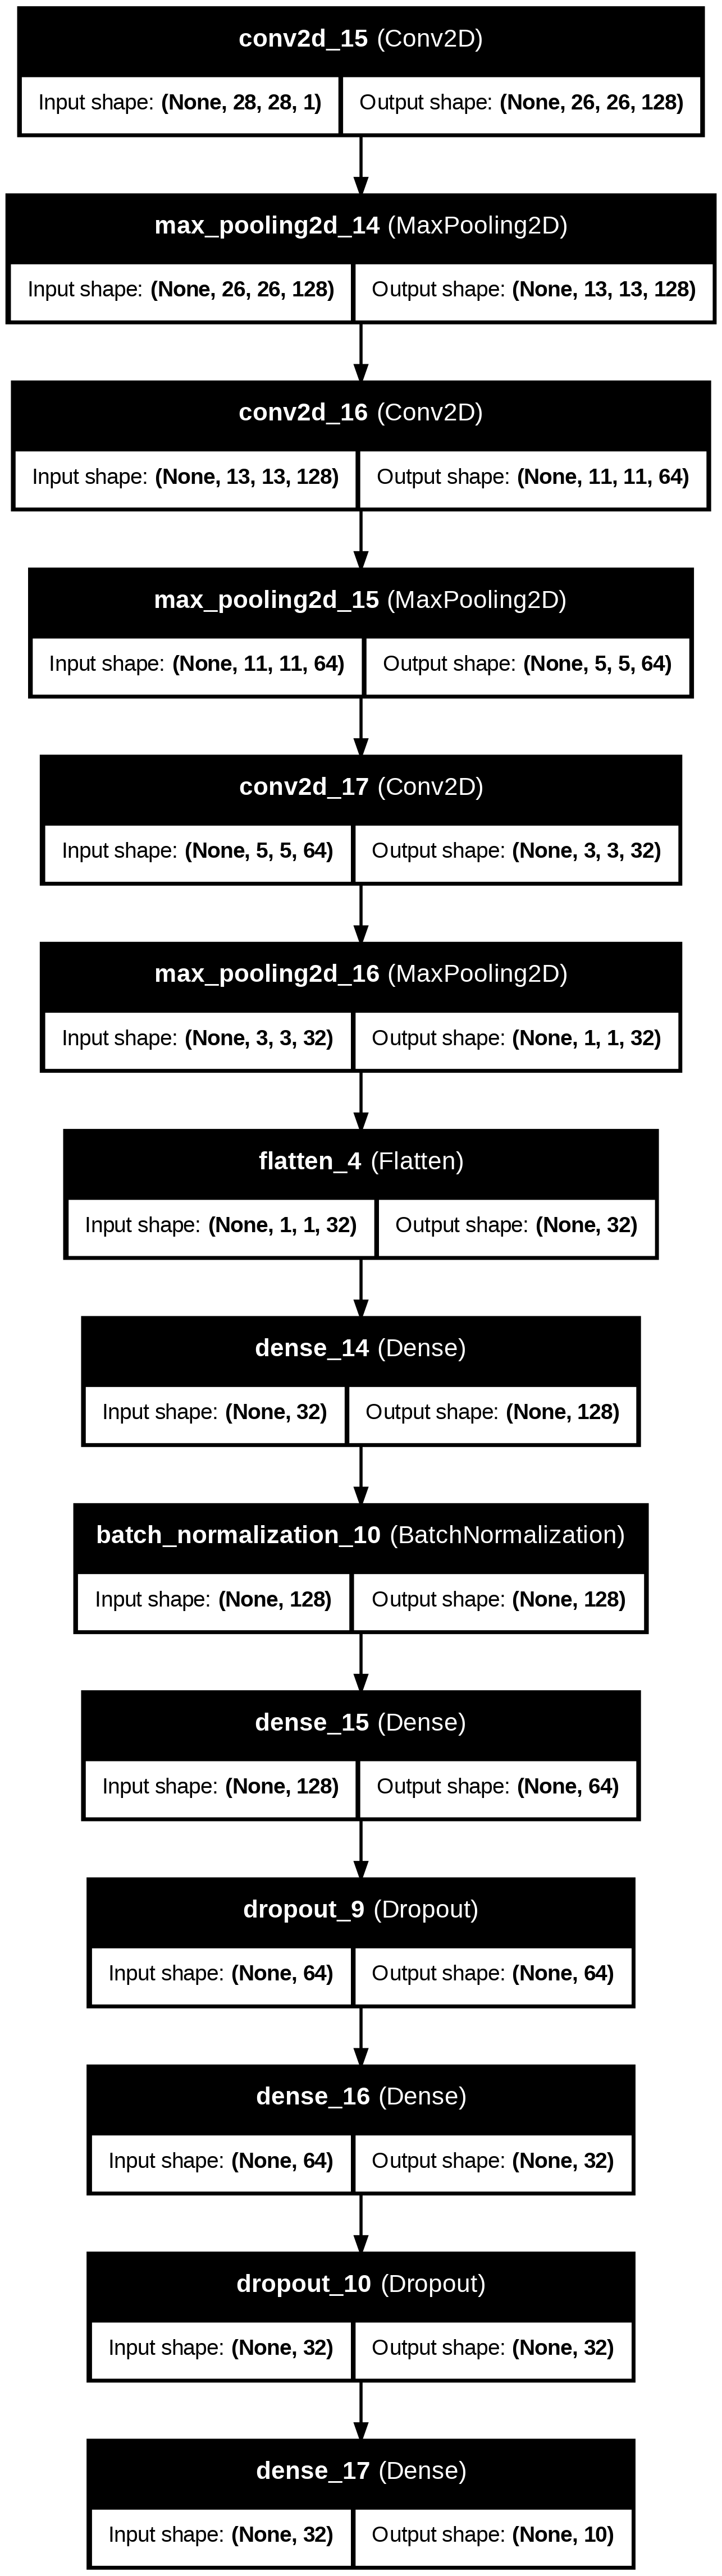

In [ ]:
# prompt: plot model architecture

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy',patience=10,verbose=1)

In [ ]:
history = model.fit(x_augmented_train, epochs=25, validation_data=(X_test.reshape(-1,28,28,1),y_test), callbacks=[es])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.7763 - loss: 0.6919 - val_accuracy: 0.9586 - val_loss: 0.1372
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9338 - loss: 0.2244 - val_accuracy: 0.9701 - val_loss: 0.0976
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9453 - loss: 0.1831 - val_accuracy: 0.9582 - val_loss: 0.1298
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9534 - loss: 0.1544 - val_accuracy: 0.9769 - val_loss: 0.0762
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9554 - loss: 0.1529 - val_accuracy: 0.9804 - val_loss: 0.0638
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9597 - loss: 0.1345 - val_accuracy: 0.9727 - val_loss: 0.0891
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9635 - loss: 0.1313 - val_accuracy: 0.9832 - val_loss: 0.0592
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9601 - loss: 0.13

In [ ]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9806

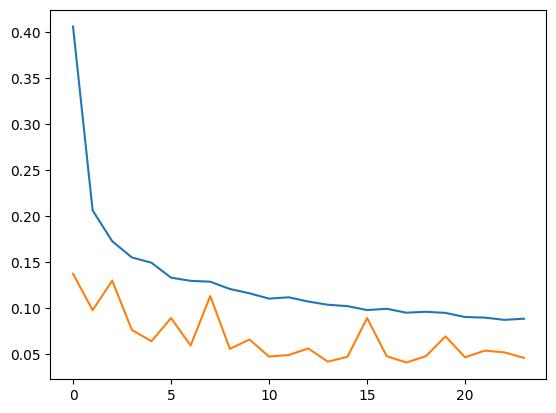

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

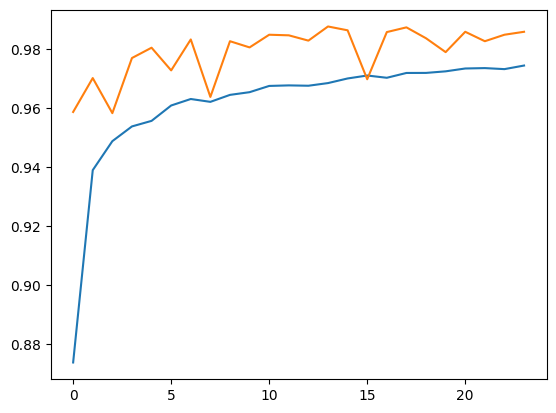

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

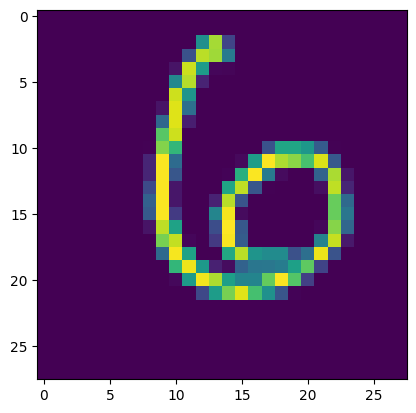

In [ ]:
plt.imshow(X_test[100])

In [ ]:
y_test[1]

2

In [ ]:
prediction=model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)
predicted_digit = prediction[0]
print("Predicted Digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
Predicted Digit: 2


In [ ]:
y_pred[100]

6

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras  # Import keras here

# Load your model only once, outside the function
  # Replace with your model path


def predict_digit(image_path):
    """
    Predicts the digit in an image using the pre-loaded model.

    Args:
        image_path (str): The path to the image file.

    Returns:
        int: The predicted digit.
    """
    try:
        img = Image.open(image_path).convert('L')
        img = img.resize((28, 28))
        img_array = np.array(img)
        img_array = img_array / 255.0
        img_array = img_array.reshape(1, 28, 28)

        prediction = model.predict(img_array).argmax(axis=1)
        print("Prediction for image:", prediction[0])

        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction: {prediction[0]}")
        plt.show()

        return prediction[0]

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/my_model.h5')  # Replace with the actual path

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
Prediction for image: 8


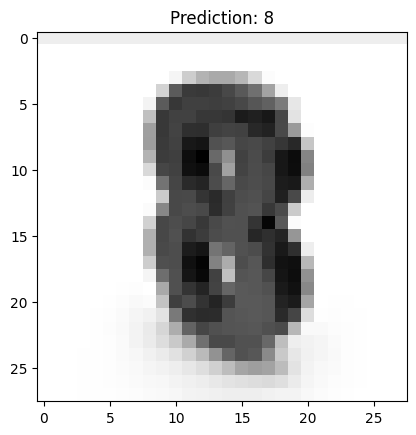

8

In [ ]:
predict_digit('/content/Screenshot 2024-12-22 125142.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for image: 9


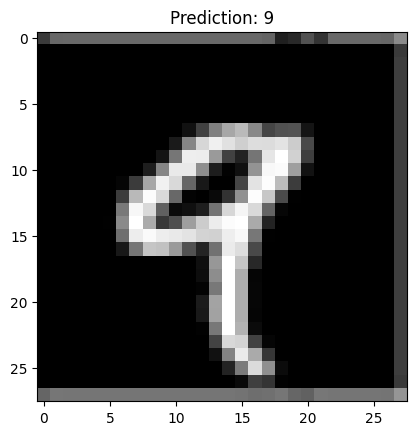

9

In [ ]:
predict_digit('/content/Screenshot 2024-12-25 013920.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for image: 3


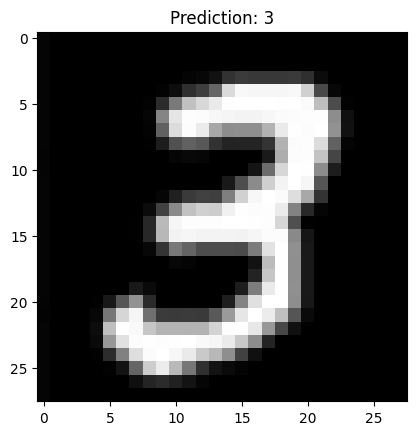

3

In [ ]:
predict_digit('/content/Screenshot 2024-12-25 013931.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for image: 5


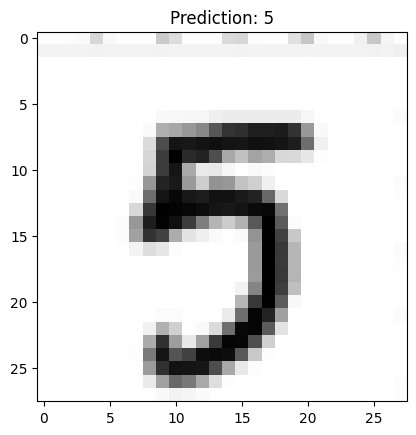

5

In [ ]:
predict_digit('/content/Screenshot 2024-12-25 014146.png')